In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

C:\Users\hello\AppData\Local\Temp\ipykernel_13792\2246890810.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('./State_wise_data.csv', index_col='Unnamed: 0')
df.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [4]:
len(df.columns)

12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      32 non-null     object 
 1   Two Wheeler                     32 non-null     int64  
 2   Three Wheeler                   32 non-null     float64
 3   Four Wheeler                    32 non-null     int64  
 4   Goods Vehicles                  32 non-null     float64
 5   Public Service Vehicle          32 non-null     float64
 6   Special Category Vehicles       32 non-null     float64
 7   Ambulance/Hearses               32 non-null     float64
 8   Construction Equipment Vehicle  32 non-null     float64
 9   Other                           32 non-null     float64
 10  Grand Total                     32 non-null     int64  
 11  total-charging-stations         24 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory u

In [6]:
df.describe()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,24.000000
mean,8829.437500,20224.562500,822.96875,94.875000,63.718750,12.81250,0.187500,12.406250,137.875000,30198.843750,57.666667
std,15027.420445,49311.798762,1661.50339,287.596912,161.503467,60.76047,0.470929,65.050283,377.119879,54220.859227,69.800752
min,1.000000,0.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,68.500000,31.500000,13.75000,1.750000,0.750000,0.00000,0.000000,0.000000,1.000000,1323.000000,7.750000
50%,1984.500000,1992.000000,131.50000,10.000000,12.500000,0.00000,0.000000,0.000000,11.000000,11156.500000,25.000000
75%,10306.500000,17007.250000,638.50000,31.250000,40.000000,1.00000,0.000000,0.000000,58.000000,45205.000000,80.250000
max,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.00000,2.000000,368.000000,1602.000000,276217.000000,265.000000


In [7]:
print('Total duplicated values: ', df.duplicated().sum(),'\n')
print('Total null values:\n')
print(df.isnull().sum(),'\n')

Total duplicated values:  0 

Total null values:

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           8
dtype: int64 



In [8]:
df["total-charging-stations"].fillna(df["total-charging-stations"].median(), inplace=True)

C:\Users\hello\AppData\Local\Temp\ipykernel_13792\1340637943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total-charging-stations"].fillna(df["total-charging-stations"].median(), inplace=True)


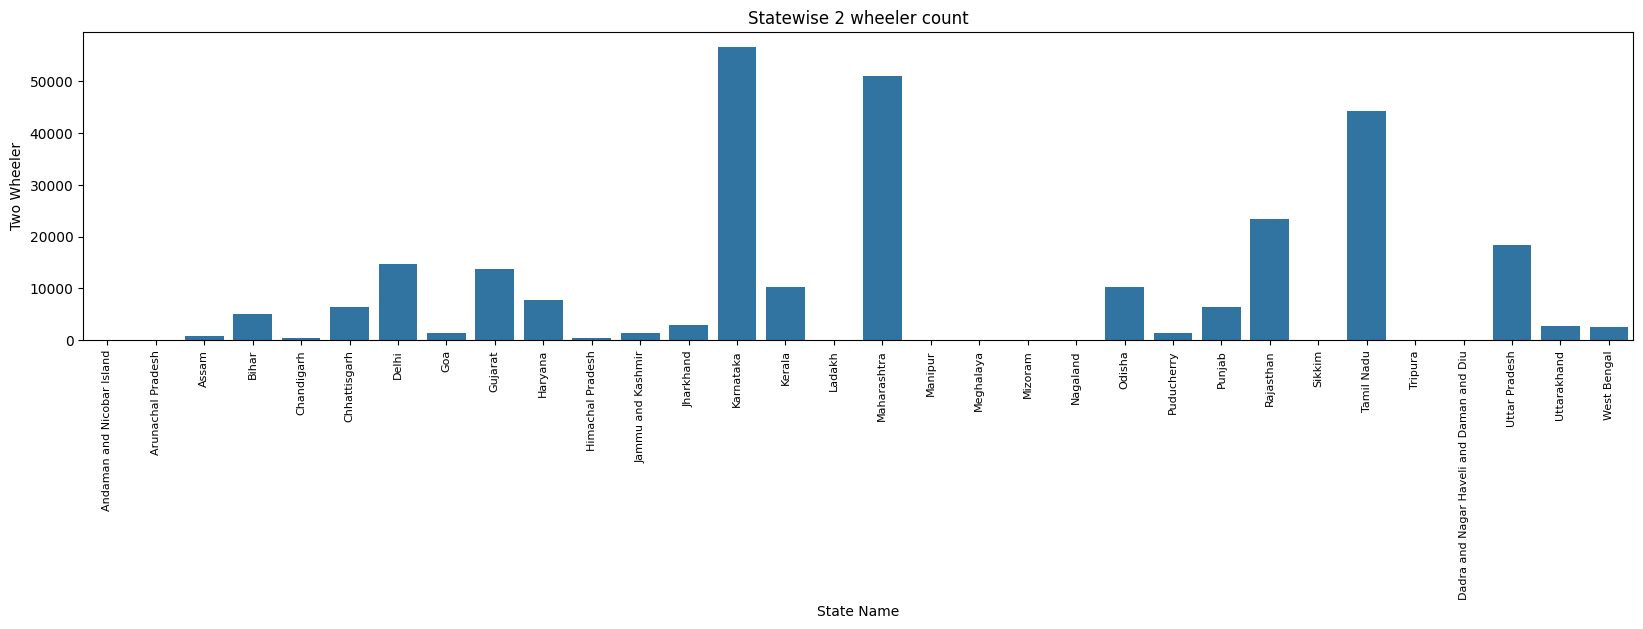

In [9]:
plt.figure(figsize=(20,4))
sns.barplot(x=df['State Name'], y=df['Two Wheeler'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise 2 wheeler count');

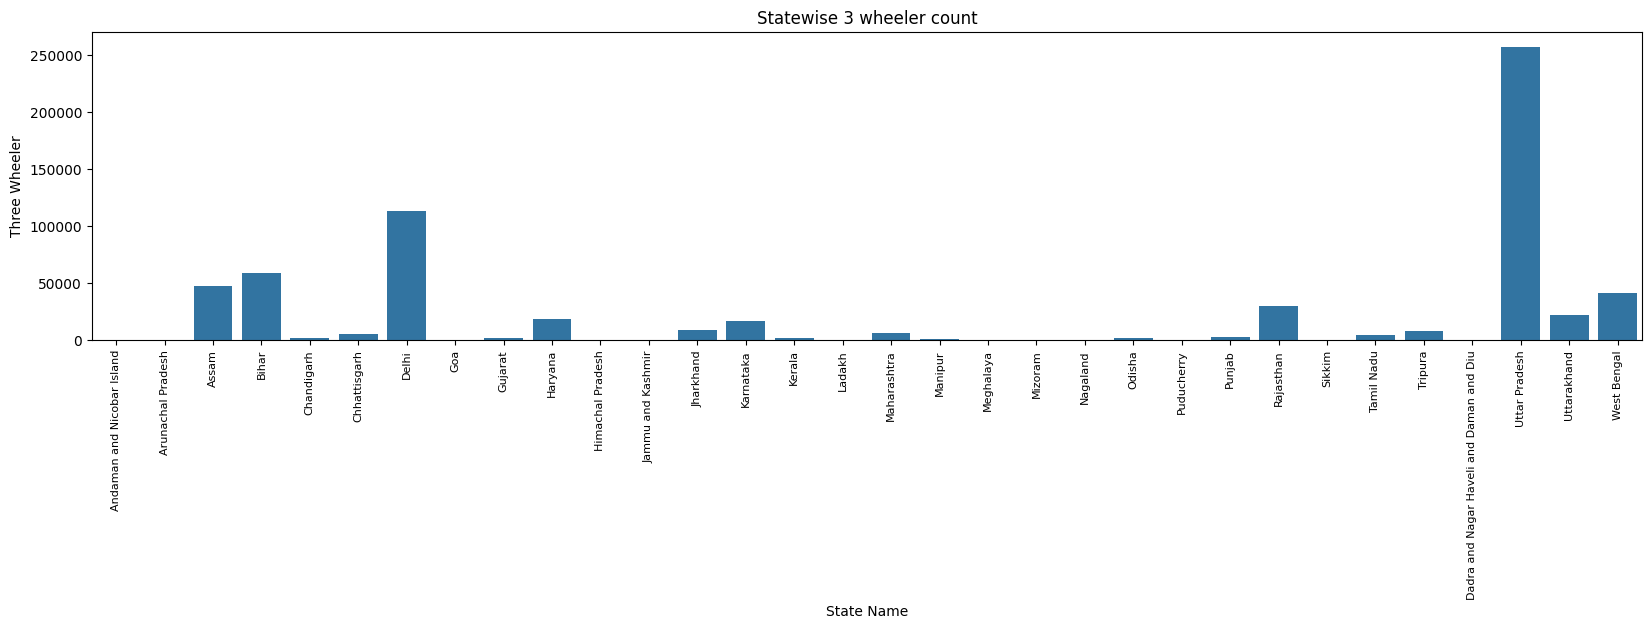

In [10]:
plt.figure(figsize=(20,4))
sns.barplot(x=df['State Name'], y=df['Three Wheeler'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise 3 wheeler count');

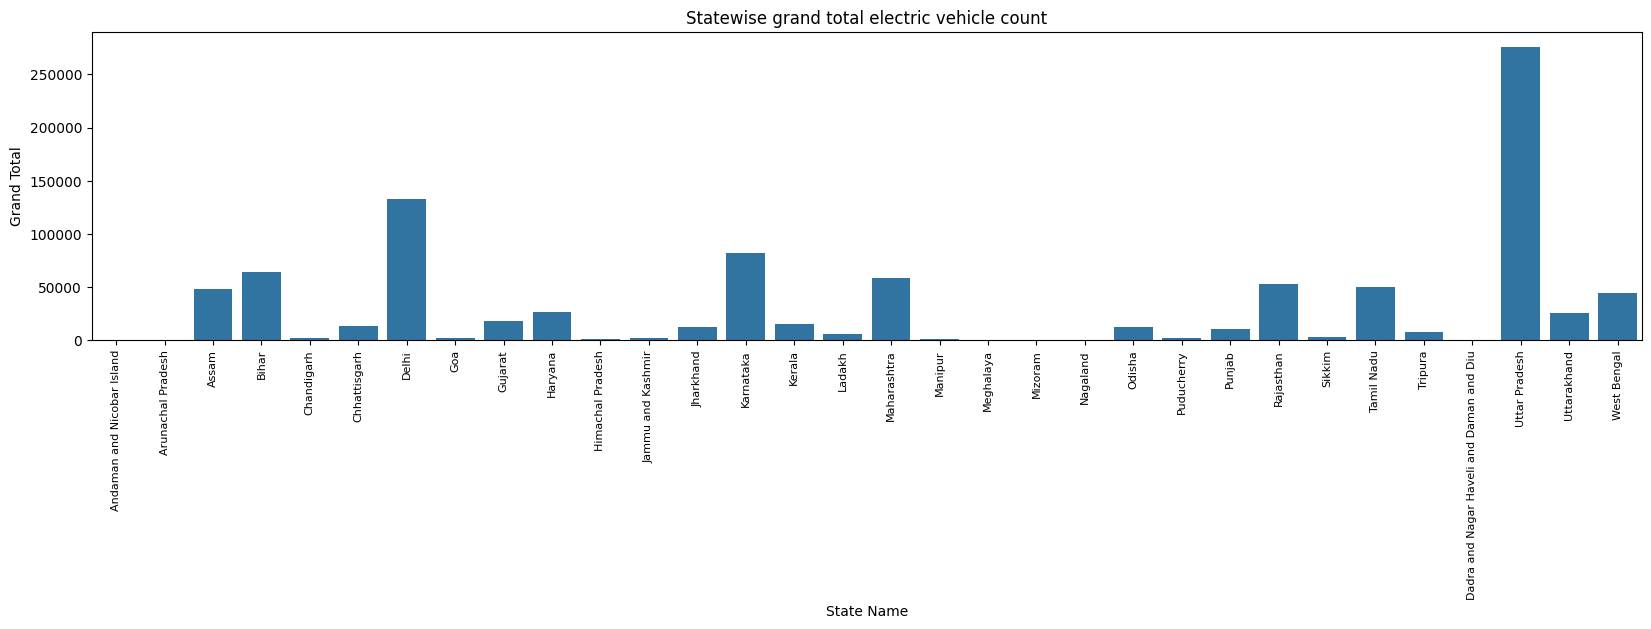

In [11]:
plt.figure(figsize=(20,4))
sns.barplot(x=df['State Name'], y=df['Grand Total'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise grand total electric vehicle count');

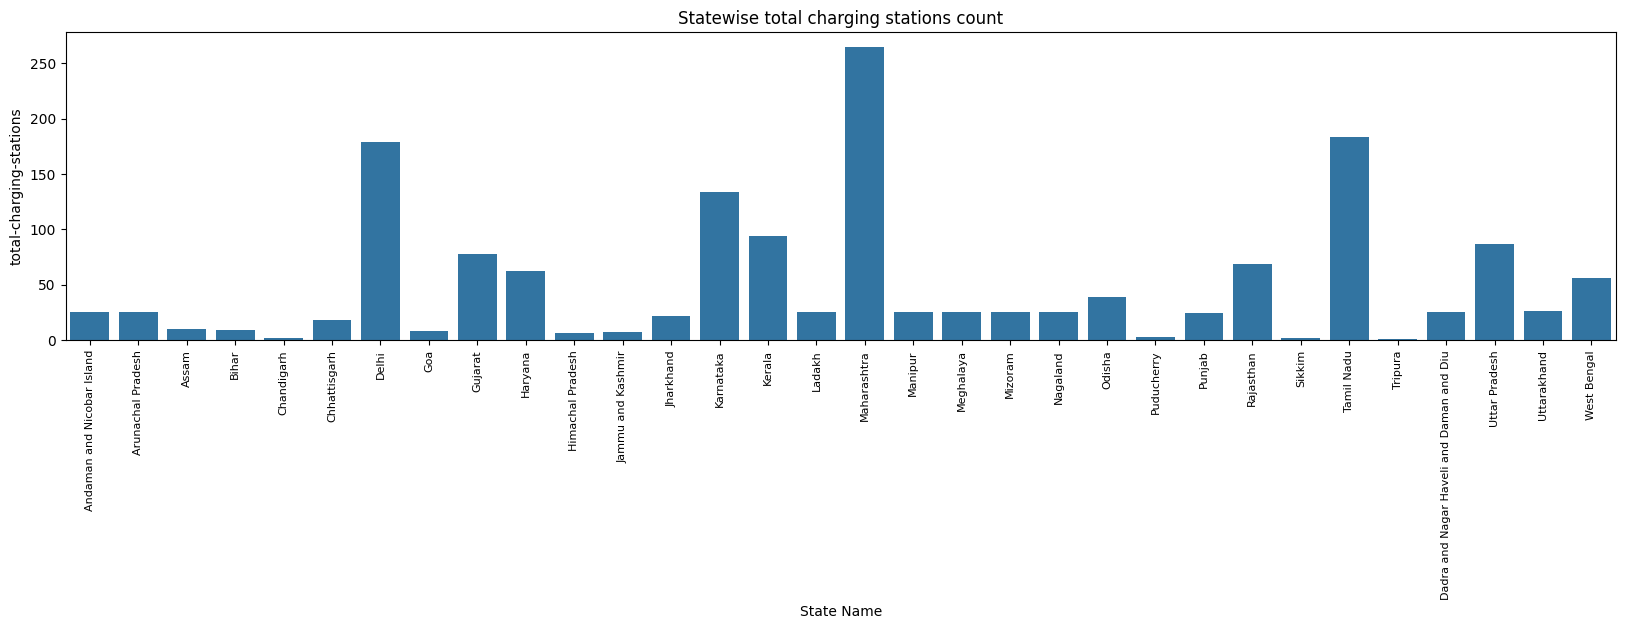

In [12]:
plt.figure(figsize=(20,4))
sns.barplot(x=df['State Name'], y=df['total-charging-stations'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Statewise total charging stations count');


### Preparing the data for clustering techniques


In [13]:
numeric_data= df.drop(columns=['State Name','Grand Total'])

In [14]:
scale=StandardScaler()
scaled_data=scale.fit_transform(numeric_data)

### DBSCAN

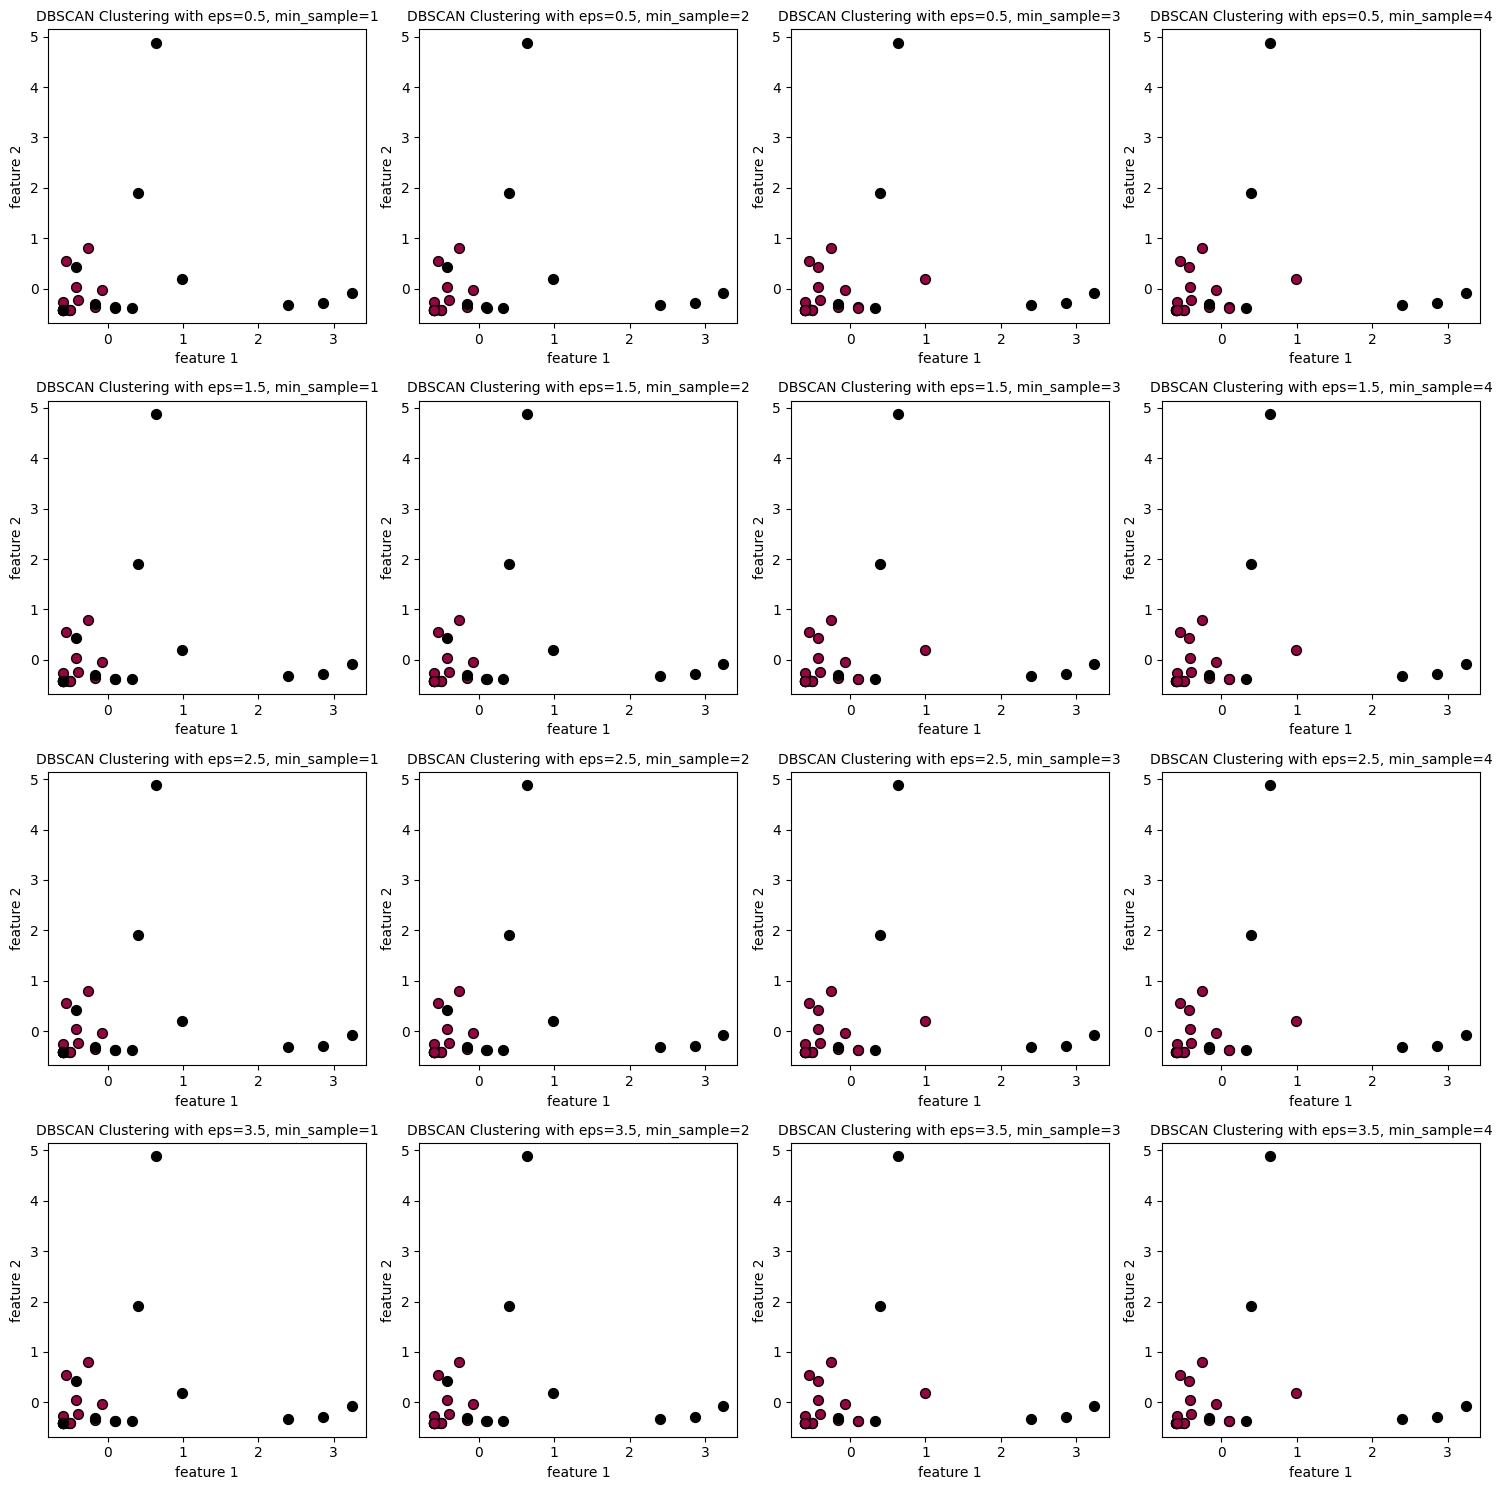

In [15]:
eps_count=[0.5,1.5,2.5,3.5]
sample_count=[1,2,3,4]

fig,axes=plt.subplots(4,4,figsize=(15,15))

X=scaled_data

for i, count in enumerate(eps_count):
  for j, count in enumerate(sample_count):


    dbscan= DBSCAN (eps=count, min_samples=3)
    labels=dbscan.fit_predict(X)

    ax=axes[i,j]

    unique_labels=set(labels)
    colors=[plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
      if k==-1:
        col=[0,0,0,1]

      class_member_mask= (labels ==k)
      xy=X[class_member_mask]
      ax.scatter(xy[:, 0], xy[:,1], c=[col], marker='o', s=50, edgecolors='k')

      ax.set_title(f'DBSCAN Clustering with eps={eps_count[i]}, min_sample={sample_count[j]}', size=10)
      ax.set_xlabel('feature 1')
      ax.set_ylabel('feature 2')

plt.tight_layout()
plt.show()

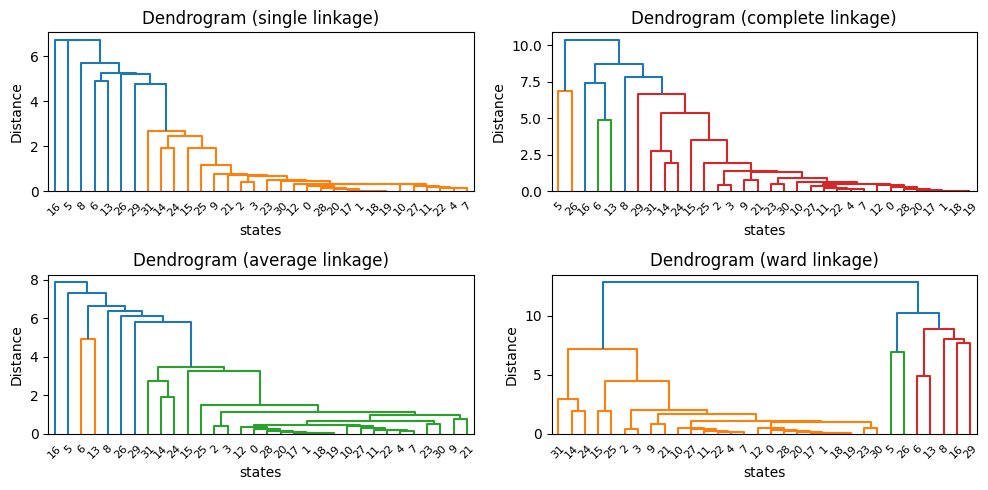

In [16]:
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(10, 5))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(scaled_data, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('states')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()
     

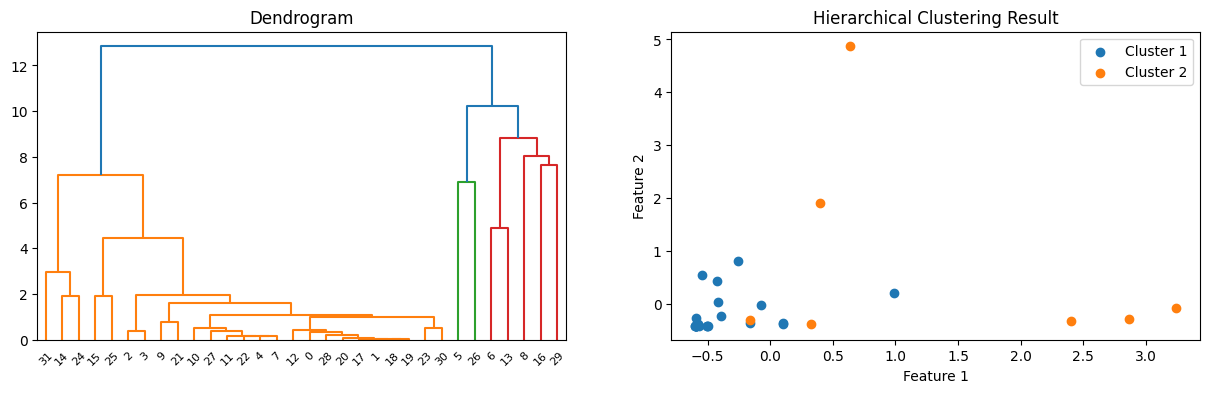

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

Z = linkage(scaled_data, method='ward')

dendrogram(Z, ax=axes[0])
axes[0].set_title('Dendrogram')

max_clusters = 2
clusters = fcluster(Z, t=max_clusters, criterion='maxclust')

for cluster_num in range(1, max_clusters + 1):
    cluster_points = scaled_data[clusters == cluster_num]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_num}')

axes[1].set_title('Hierarchical Clustering Result')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.show()

### PCA Analysis

In [18]:
pca = PCA()
pca.fit(scaled_data)
pca_transformed_data2 = pca.transform(scaled_data)
pca_statewise = pd.DataFrame(pca_transformed_data2, index=df['State Name'], columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
pca_statewise['PC1'].sort_values(ascending=False)

State Name
Maharashtra                                 5.783637
Karnataka                                   5.240916
Delhi                                       3.382565
Tamil Nadu                                  2.525093
Uttar Pradesh                               1.637155
Gujarat                                     1.099858
West Bengal                                 0.959362
Kerala                                      0.881124
Rajasthan                                   0.757098
Ladakh                                     -0.291362
Haryana                                    -0.328411
Chhattisgarh                               -0.513318
Odisha                                     -0.615924
Punjab                                     -0.778412
Uttarakhand                                -0.836923
Bihar                                      -0.845363
Jharkhand                                  -0.955692
Sikkim                                     -0.962445
Assam                              

In [19]:
data=pca_statewise.reset_index()
data=data.drop(columns=['State Name'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.057428,-0.239447,-0.137814,-0.016151,-0.155338,0.302590,-0.286828,-0.060221,-0.083222,-0.012088
1,-1.163195,-0.208596,-0.029375,-0.014663,-0.156222,0.323529,-0.165464,-0.179097,-0.047672,0.094116
2,-1.046048,-0.337621,-0.087778,0.631750,0.318039,-0.110715,0.109475,-0.035301,0.113239,-0.089675
3,-0.845363,-0.329689,-0.161666,0.811170,0.398637,-0.130883,0.209025,0.030583,0.342375,-0.084148
4,-1.225572,-0.264302,-0.063499,-0.037449,-0.113814,0.187566,-0.266703,0.043789,0.121666,-0.224601
5,-0.513318,6.233478,0.298058,0.107034,0.241935,-1.862696,-1.036408,0.028496,0.078890,0.071070
6,3.382565,-0.606444,1.891242,1.144821,2.299387,0.322062,-0.833200,-1.662967,-0.702378,0.043330
7,-1.125841,-0.224533,-0.033918,-0.093639,-0.104049,0.228649,-0.220158,0.060857,0.096692,-0.169499
8,1.099858,-0.135062,-3.234171,-3.702616,2.521497,-0.838704,0.847440,-0.396363,-0.002969,-0.030197
9,-0.328411,0.099273,-0.028345,0.247688,0.029060,0.527228,0.135985,-0.196520,-0.092280,0.241584


In [20]:

data.iloc[1,0]

-1.1631954419937756

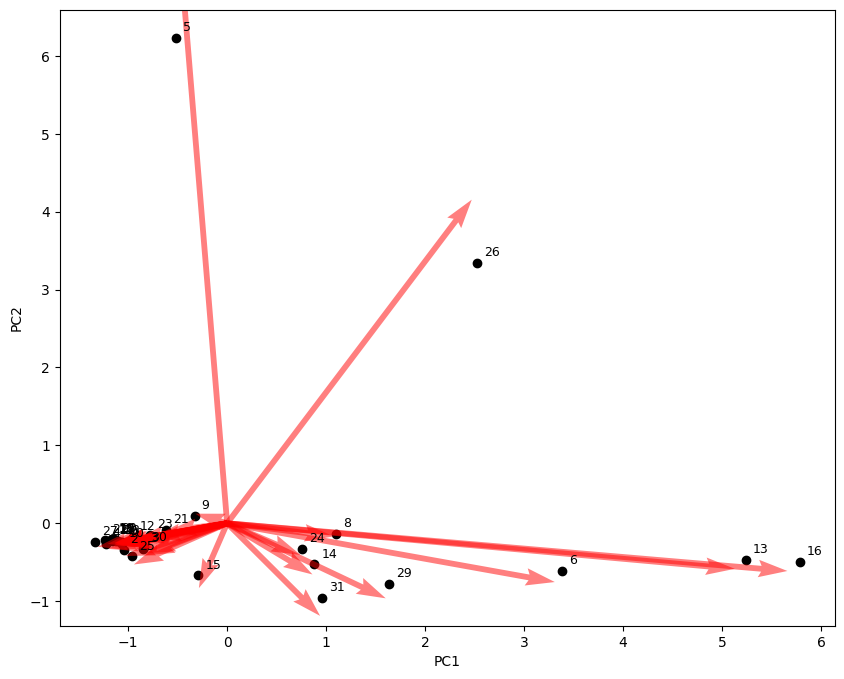

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# plotting the projected data points
plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], color='black', alpha=1)

# adding arrows in the data
for i in range(len(data)):
    plt.quiver(0, 0, data.iloc[i, 0], data.iloc[i, 1], color='red', label=str(i), alpha=0.5, scale=8)
    plt.annotate(str(i), (data.iloc[i, 0], data.iloc[i, 1]), textcoords='offset points', xytext=(5,5), color='black', size=9)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### K Means Clustering

Best cluster number is: 7
Silhouette score for the best cluster number: 0.5895670176895731
{2: 0.5626272762907292, 3: 0.5699246525258063, 4: 0.576888027862709, 5: 0.584825705591317, 6: 0.5818448367144011, 7: 0.5895670176895731, 8: 0.5384868397941163}


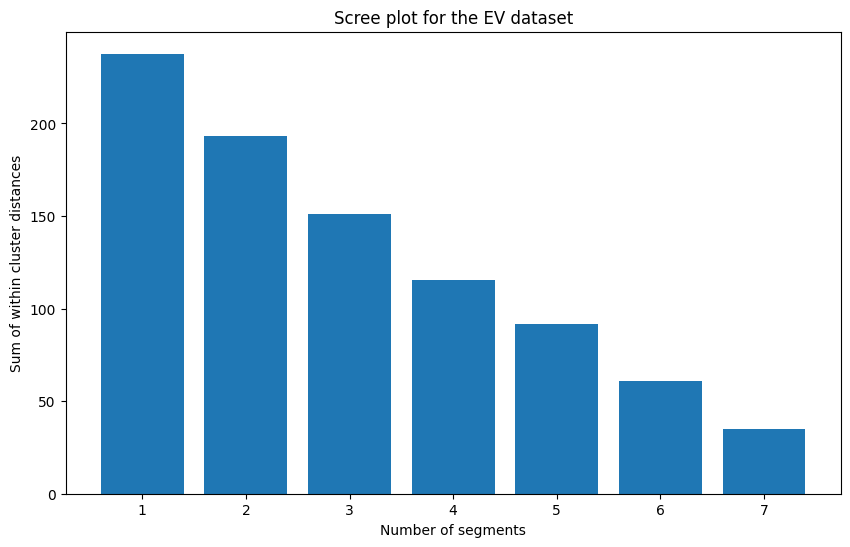

In [22]:
inertia=[]
cluster_result=[] 
silhouette_scores={}

best_cluster_num=2
best_silhouette_score=-1

for k in range(2,9):
  km=KMeans(n_clusters=k, n_init=10, random_state=10)
  km.fit(pca_statewise) 
  labels=km.predict(pca_statewise) 
  s_score=silhouette_score(pca_statewise, labels)
  silhouette_scores[k]=s_score
  inertia.append(km.inertia_)
  cluster_result.append(labels)

  if s_score> best_silhouette_score:
    best_silhouette_score= s_score
    best_cluster_num= k

print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(silhouette_scores)


plt.figure(figsize=(10,6))
plt.bar(range(1,len(inertia)+1), inertia)
plt.title('Scree plot for the EV dataset')
plt.ylabel('Sum of within cluster distances')
plt.xlabel('Number of segments');
     


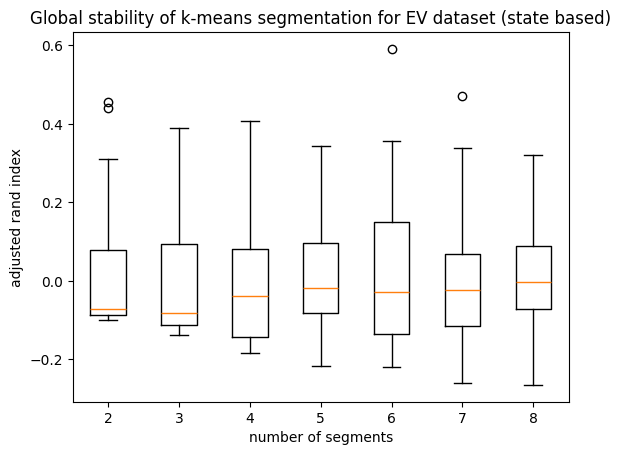

In [23]:
n_bootstraps=100
ARI_scores=[]
for labels in cluster_result:
  ari_boot=[]
  for _ in range(n_bootstraps):
    random_sample=np.random.choice(labels, size=len(labels), replace=True)
    ari = adjusted_rand_score(labels, random_sample)
    ari_boot.append(ari)
  ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2,9))
plt.xlabel('number of segments')
plt.ylabel('adjusted rand index')
plt.title('Global stability of k-means segmentation for EV dataset (state based)')
plt.show()

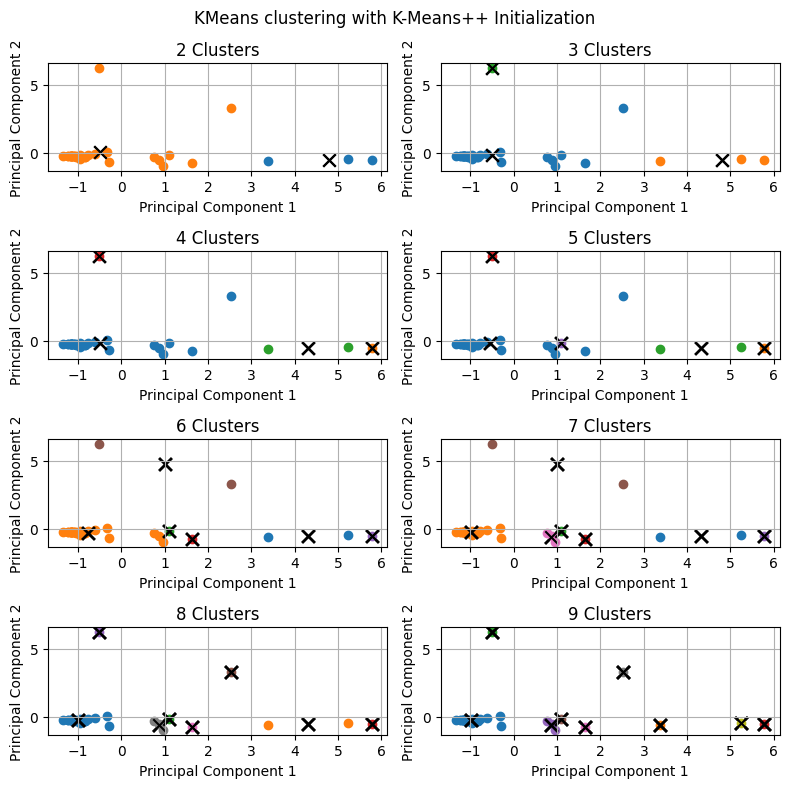

In [24]:
cluster_range = range(2, 10)
fig, axes = plt.subplots(4, 2, figsize=(8, 8))

for i, num_clusters in enumerate(cluster_range):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1234, n_init=10, init='k-means++')
    labels = kmeans.fit_predict(pca_statewise)

    ax = axes.flat[i]

    for cluster_num in range(num_clusters):
        cluster_data = pca_statewise[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

plt.suptitle('KMeans clustering with K-Means++ Initialization')
plt.tight_layout()
plt.show()

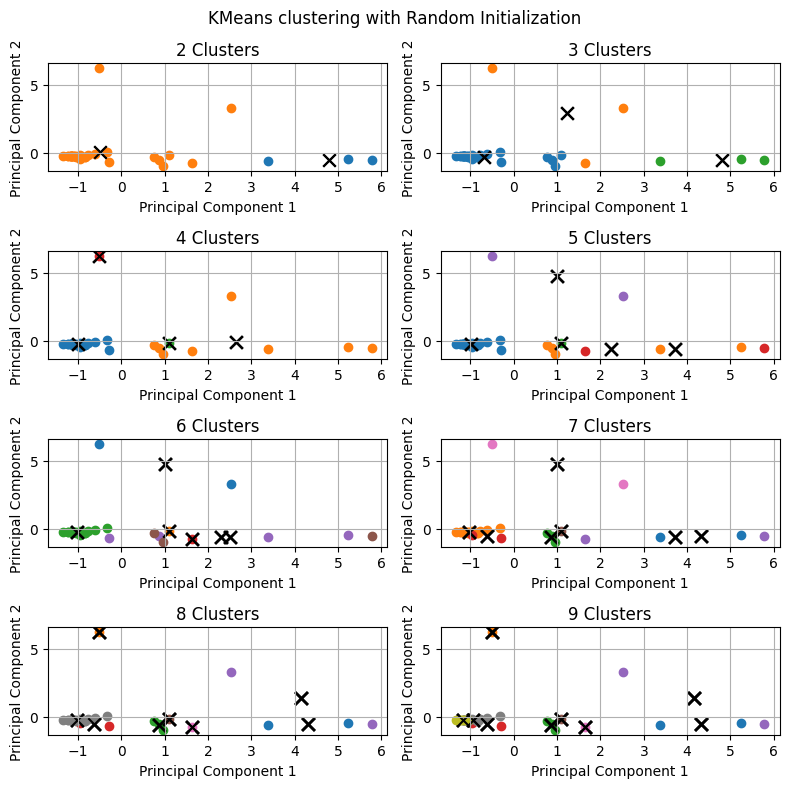

In [25]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 8)
fig, axes = plt.subplots(4, 2, figsize=(8, 8))  # Adjust figsize for more plots

# Assuming pca_statewise is your data after PCA transformation

for i, num_clusters in enumerate(cluster_range):
    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=1234, n_init=10, init='random')
    labels = kmeans.fit_predict(pca_statewise)

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]

    for cluster_num in range(num_clusters):
        cluster_data = pca_statewise[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with Random Initialization')
plt.tight_layout()
plt.show()

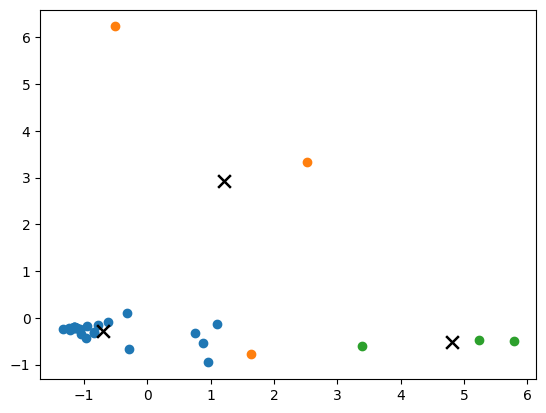

In [26]:
# Perform kmeans clustering with cluster number 3 and random initialization
kmeans = KMeans(n_clusters=3, random_state=1234, n_init=10, init='random')
labels = kmeans.fit_predict(pca_statewise)

for clus_num in range(3):
  # plotting clusters
  cluster_data=pca_statewise[labels==clus_num]
  plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1])

  # plotting cluster centres
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', color='black', label='cluster centers', s=80)

In [27]:
# merging cluster labels to the original dataset
cluster_labels=pd.Series(labels)
df['cluster-labels']=cluster_labels
df.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations,cluster-labels
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,25.0,0
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,25.0,0
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0,0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0,0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0,0


In [28]:
df

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations,cluster-labels
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,25.0,0
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,25.0,0
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0,0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0,0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0,0
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,18.0,1
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,179.0,2
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,8.0,0
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,78.0,0
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,62.0,0


In [29]:
cols=['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total', 'total-charging-stations']

In [30]:
df.groupby(['cluster-labels','State Name'])[cols].sum()

Two Wheeler  \
cluster-labels State Name                                              
0              Andaman and Nicobar Island                          1   
               Arunachal Pradesh                                  14   
               Assam                                             721   
               Bihar                                            5003   
               Chandigarh                                        298   
               Dadra and Nagar Haveli and Daman and Diu           69   
               Goa                                              1314   
               Gujarat                                         13662   
               Haryana                                          7777   
               Himachal Pradesh                                  368   
               Jammu and Kashmir                                1417   
               Jharkhand                                        2961   
               Kerala                                          10299   
               Ladakh                                             12   
               Manipur                                            86   
               Meghalaya                                          16   
               Mizoram                                             9   
               Nagaland                                           44   
               Odisha                                          10329   
               Puducherry                                       1429   
               Punjab                                           6408   
               Rajasthan                                       23446   
               Sikkim                                              1   
               Tripura                                            67   
               Uttarakhand                                      2614   
               West Bengal                                      2540   
1              Chhattisgarh                                     6424   
               Tamil Nadu                                      44302   
               Uttar Pradesh                                   18295   
2              Delhi                                           14730   
               Karnataka                                       56737   
               Maharashtra                                     51149   

                                                         Three Wheeler  \
cluster-labels State Name                                                
0              Andaman and Nicobar Island                         30.0   
               Arunachal Pradesh                                   0.0   
               Assam                                           47041.0   
               Bihar                                           59079.0   
               Chandigarh                                       1410.0   
               Dadra and Nagar Haveli and Daman and Diu           36.0   
               Goa                                                28.0   
               Gujarat                                          1869.0   
               Haryana                                         18595.0   
               Himachal Pradesh                                  167.0   
               Jammu and Kashmir                                  43.0   
               Jharkhand                                        8986.0   
               Kerala                                           2115.0   
               Ladakh                                              0.0   
               Manipur                                           443.0   
               Meghalaya                                           6.0   
               Mizoram                                             1.0   
               Nagaland                                            0.0   
               Odisha                                           1808.0   
               Puducherry                             

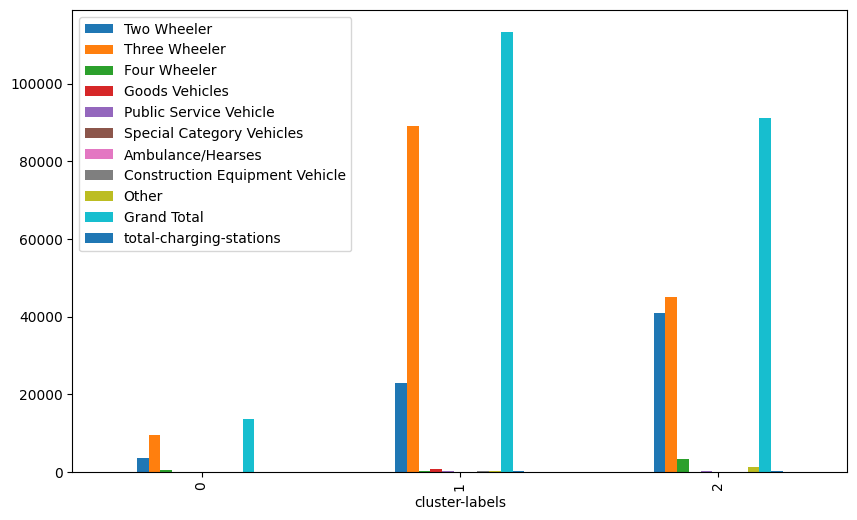

In [31]:
df.groupby('cluster-labels').mean(numeric_only=True).plot(kind='bar', figsize=(10,6));

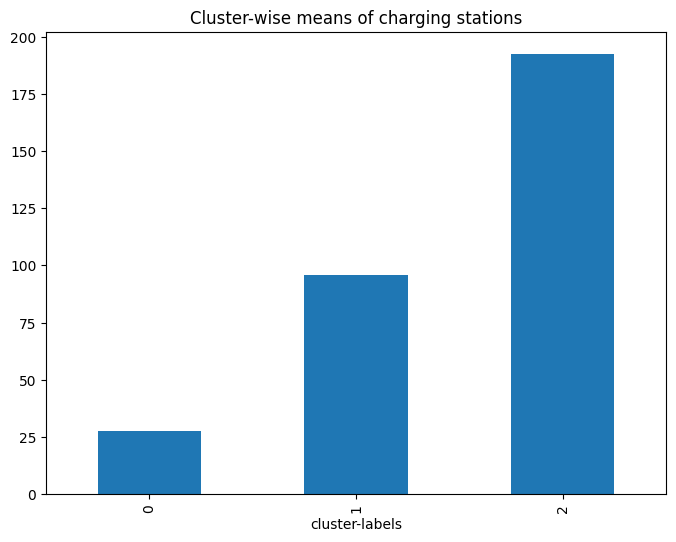

In [32]:
df.groupby('cluster-labels')['total-charging-stations'].mean().plot(kind='bar', figsize=(8,6));
plt.title('Cluster-wise means of charging stations');

In [33]:
df.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total', 'total-charging-stations', 'cluster-labels'],
      dtype='object')

In [34]:
# two wheeler mean
twow_mean=df.groupby('cluster-labels')['Two Wheeler'].mean()
print(twow_mean,'\n','****'*20)

# three wheeler mean
threew_mean=df.groupby('cluster-labels')['Three Wheeler'].mean()
print(threew_mean,'\n','****'*20)

# charging stations mean
charge_mean=df.groupby('cluster-labels')['total-charging-stations'].mean()
print(charge_mean,'\n','****'*20)

cluster-labels
0     3496.346154
1    23007.000000
2    40872.000000
Name: Two Wheeler, dtype: float64 
 ********************************************************************************
cluster-labels
0     9413.538462
1    88990.000000
2    45154.666667
Name: Three Wheeler, dtype: float64 
 ********************************************************************************
cluster-labels
0     27.615385
1     96.000000
2    192.666667
Name: total-charging-stations, dtype: float64 
 ********************************************************************************


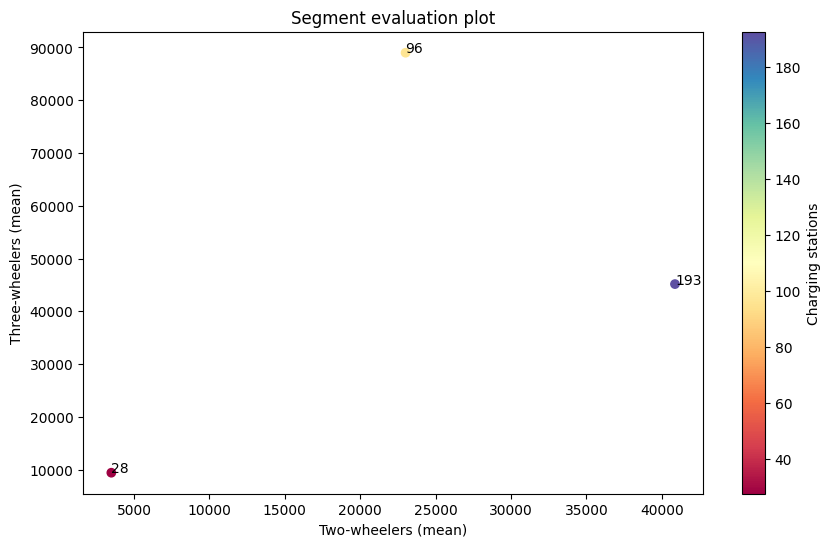

In [35]:
# setting up the figure
plt.figure(figsize=(10,6))

# plotting scatter plot
plt.scatter(twow_mean, threew_mean, c=charge_mean, cmap='Spectral')

# adding labels
plt.xlabel('Two-wheelers (mean)')
plt.ylabel('Three-wheelers (mean)')
plt.title('Segment evaluation plot')
plt.colorbar(label='Charging stations')

# annotating the data points
for i,j,k in zip(twow_mean, threew_mean, charge_mean):
    plt.text(i, j+0.1, round(k))
plt.show()

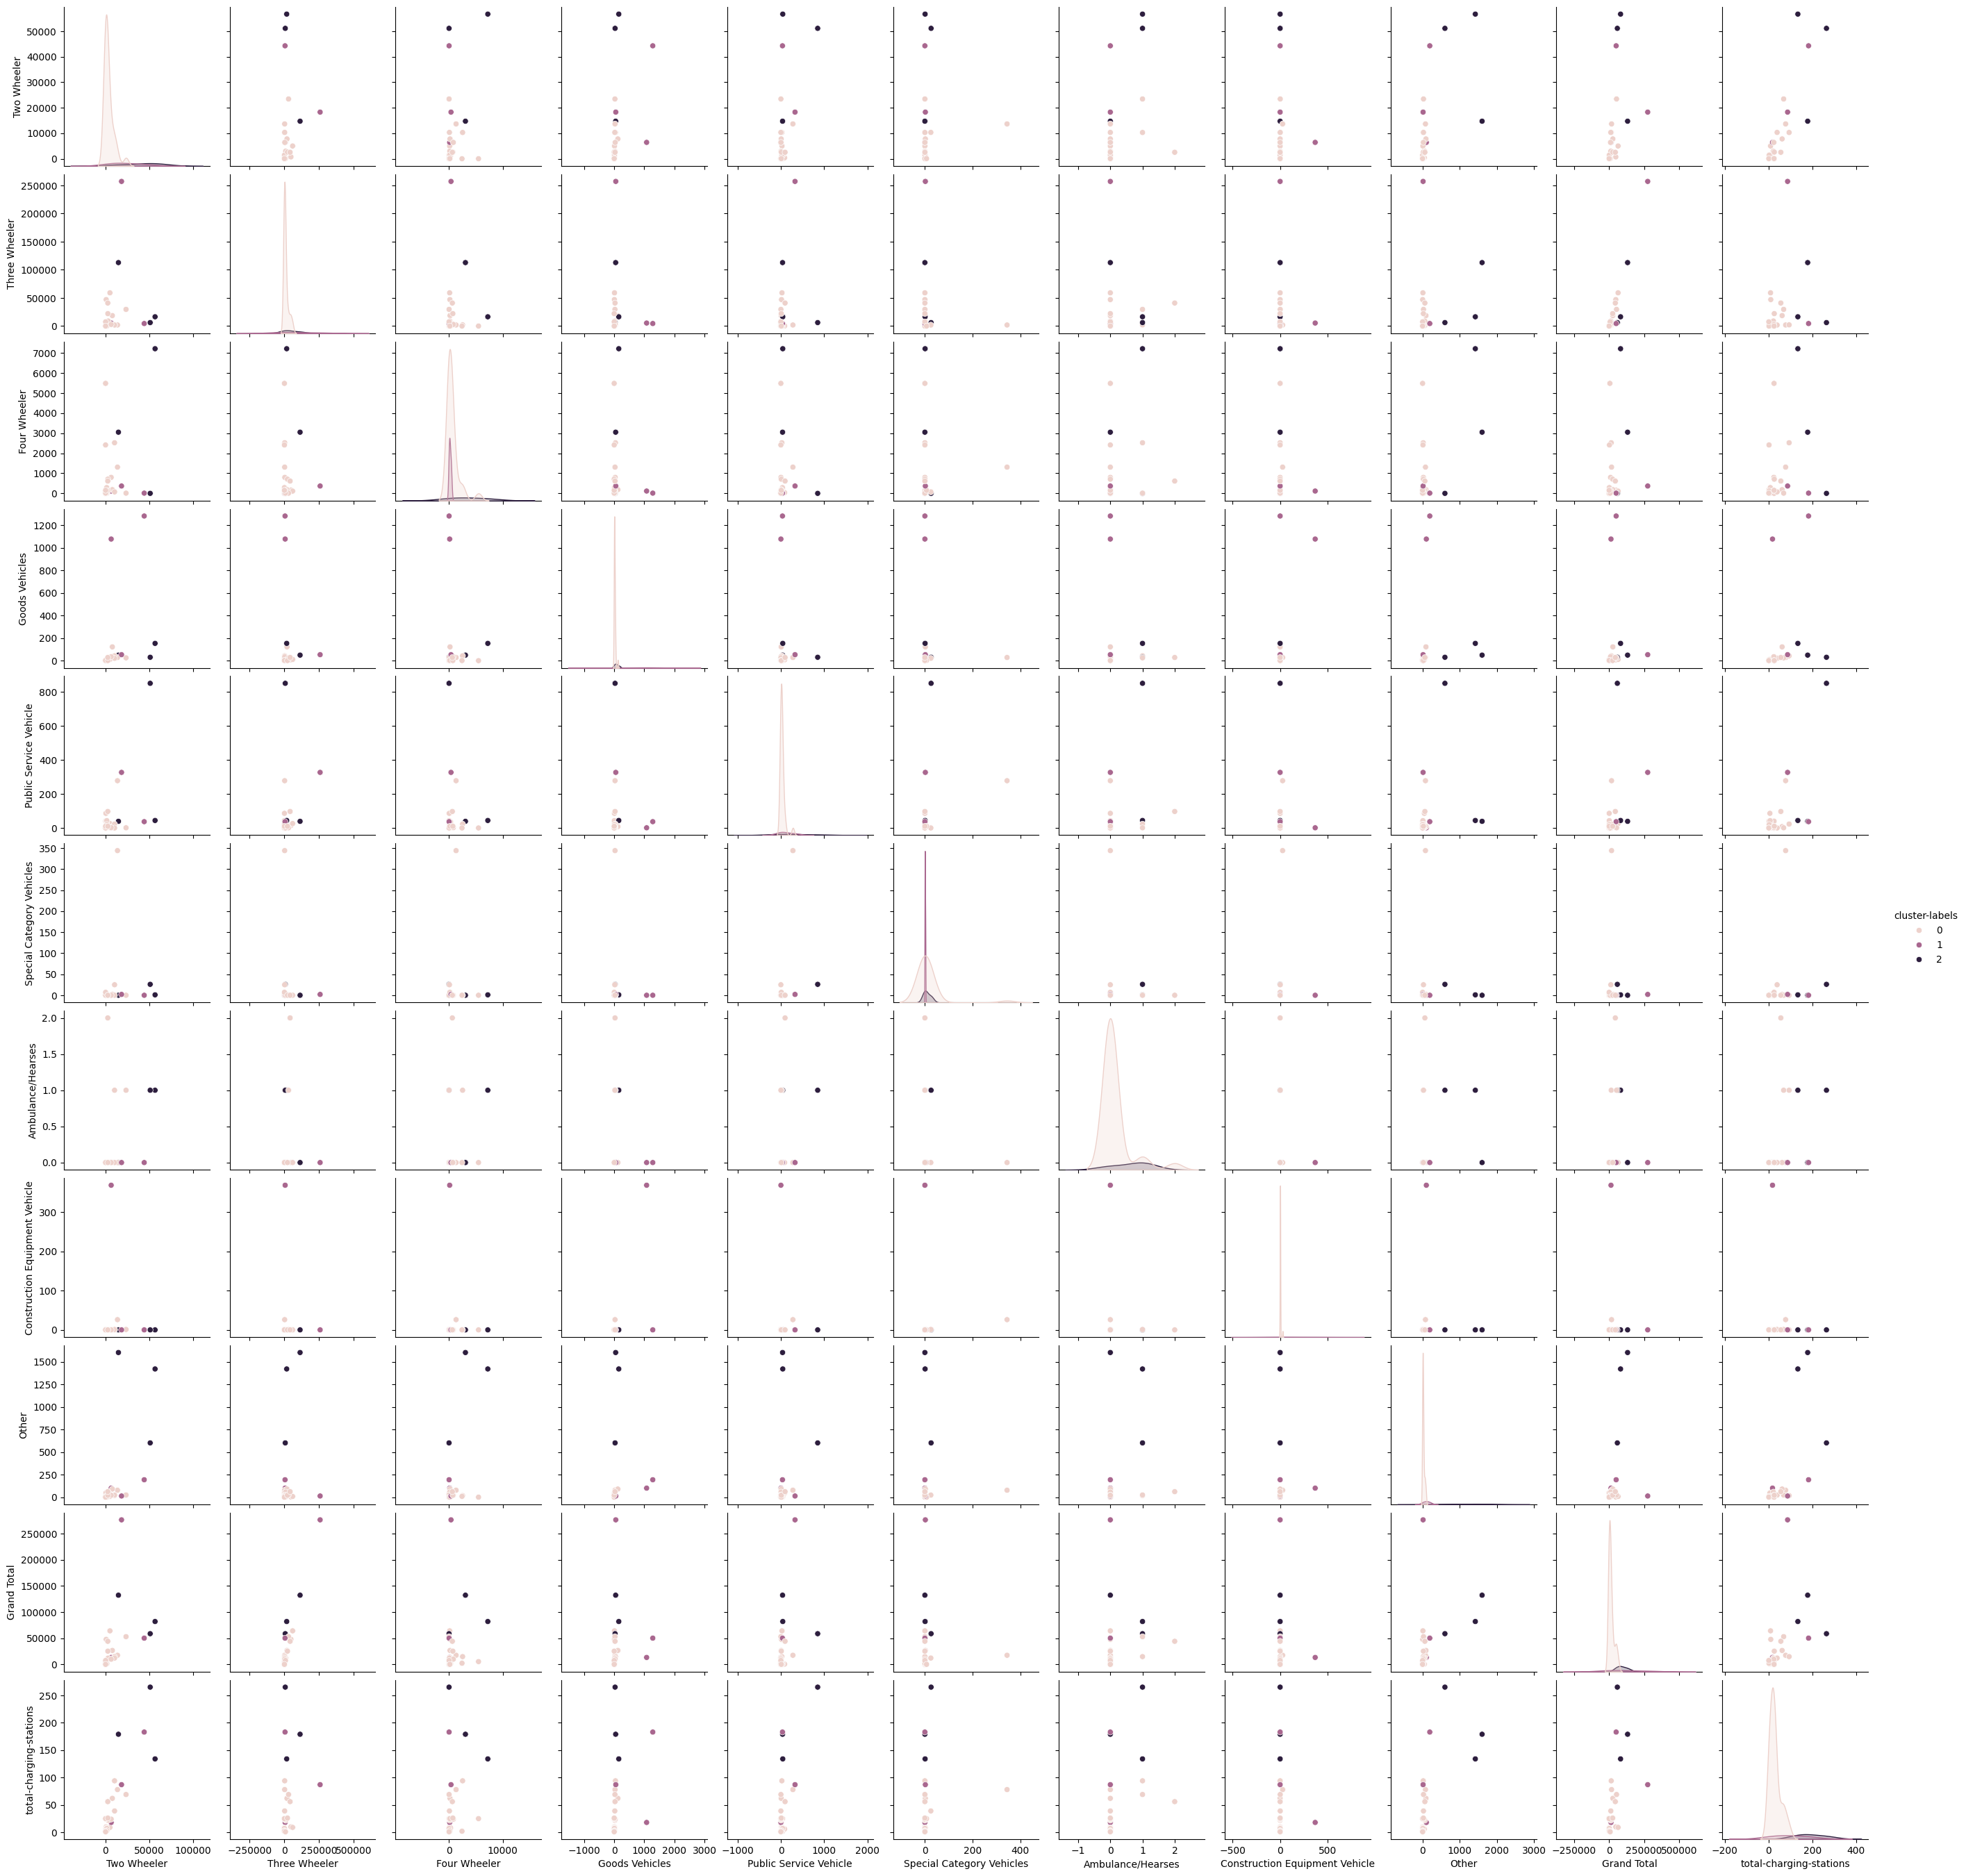

In [36]:
# distribution of clusters over different features of the dataset
sns.pairplot(data=df, hue='cluster-labels');